# COVID-19 Dataset: This dataset contains information about the number of COVID-19 cases in different countries over time. You could use this data to predict the number of cases in the future."

In [1]:
import pandas as pd

# Load the datasets
data_country_wise = pd.read_csv('Resources/country_wise_latest.csv')
data_covid_19_clean = pd.read_csv('Resources/covid_19_clean_complete.csv')
data_day_wise = pd.read_csv('Resources/day_wise.csv')
data_full_grouped = pd.read_csv('Resources/full_grouped.csv')
data_usa_county_wise = pd.read_csv('Resources/usa_county_wise.csv')
data_worldometer = pd.read_csv('Resources/worldometer_data.csv')

# Display the first few rows of the data
print(data_country_wise.head())
print(data_covid_19_clean.head())
print(data_day_wise.head())
print(data_full_grouped.head())
print(data_usa_county_wise.head())
print(data_worldometer.head())


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [2]:
# Combine the datasets
data_combined = pd.concat([data_country_wise, data_covid_19_clean, data_day_wise, data_full_grouped, data_usa_county_wise, data_worldometer], axis=0)

# Handle missing values
data_combined.fillna(0, inplace=True)

# Convert date columns to datetime
for col in data_combined.columns:
    if 'date' in col.lower():
        data_combined[col] = pd.to_datetime(data_combined[col])

# Display the first few rows of the combined data
print(data_combined.head())


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan    36263.0  1269.0    25198.0  9796.0      106.0        10.0   
1        Albania     4880.0   144.0     2745.0  1991.0      117.0         6.0   
2        Algeria    27973.0  1163.0    18837.0  7973.0      616.0         8.0   
3        Andorra      907.0    52.0      803.0    52.0       10.0         0.0   
4         Angola      950.0    41.0      242.0   667.0       18.0         1.0   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  ...  TotalDeaths  \
0           18.0                3.50                  69.49  ...          0.0   
1           63.0                2.95                  56.25  ...          0.0   
2          749.0                4.16                  67.34  ...          0.0   
3            0.0                5.73                  88.53  ...          0.0   
4            0.0                4.32                  25.47  ...          0.0   

   NewDeaths  TotalRecover

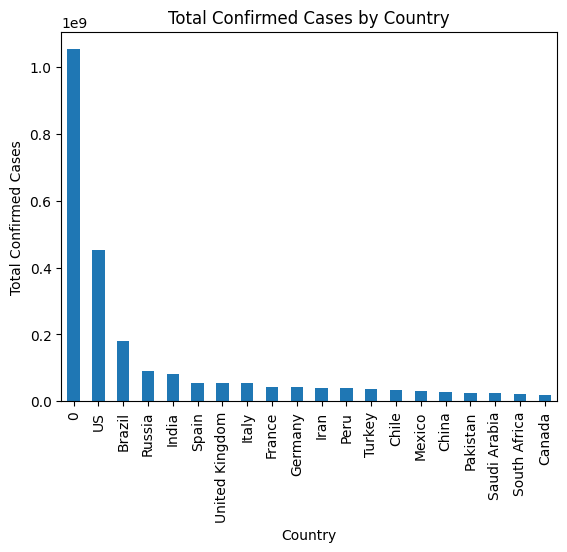

In [3]:
import matplotlib.pyplot as plt

# Calculate the total number of cases for each country
total_cases_by_country = data_combined.groupby('Country/Region')['Confirmed'].sum()

# Plot the total number of cases for each country
total_cases_by_country.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Total Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.show()


/var/folders/0q/2y70gylj1sj8j0697rn106q00000gn/T/ipykernel_20118/1303058960.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


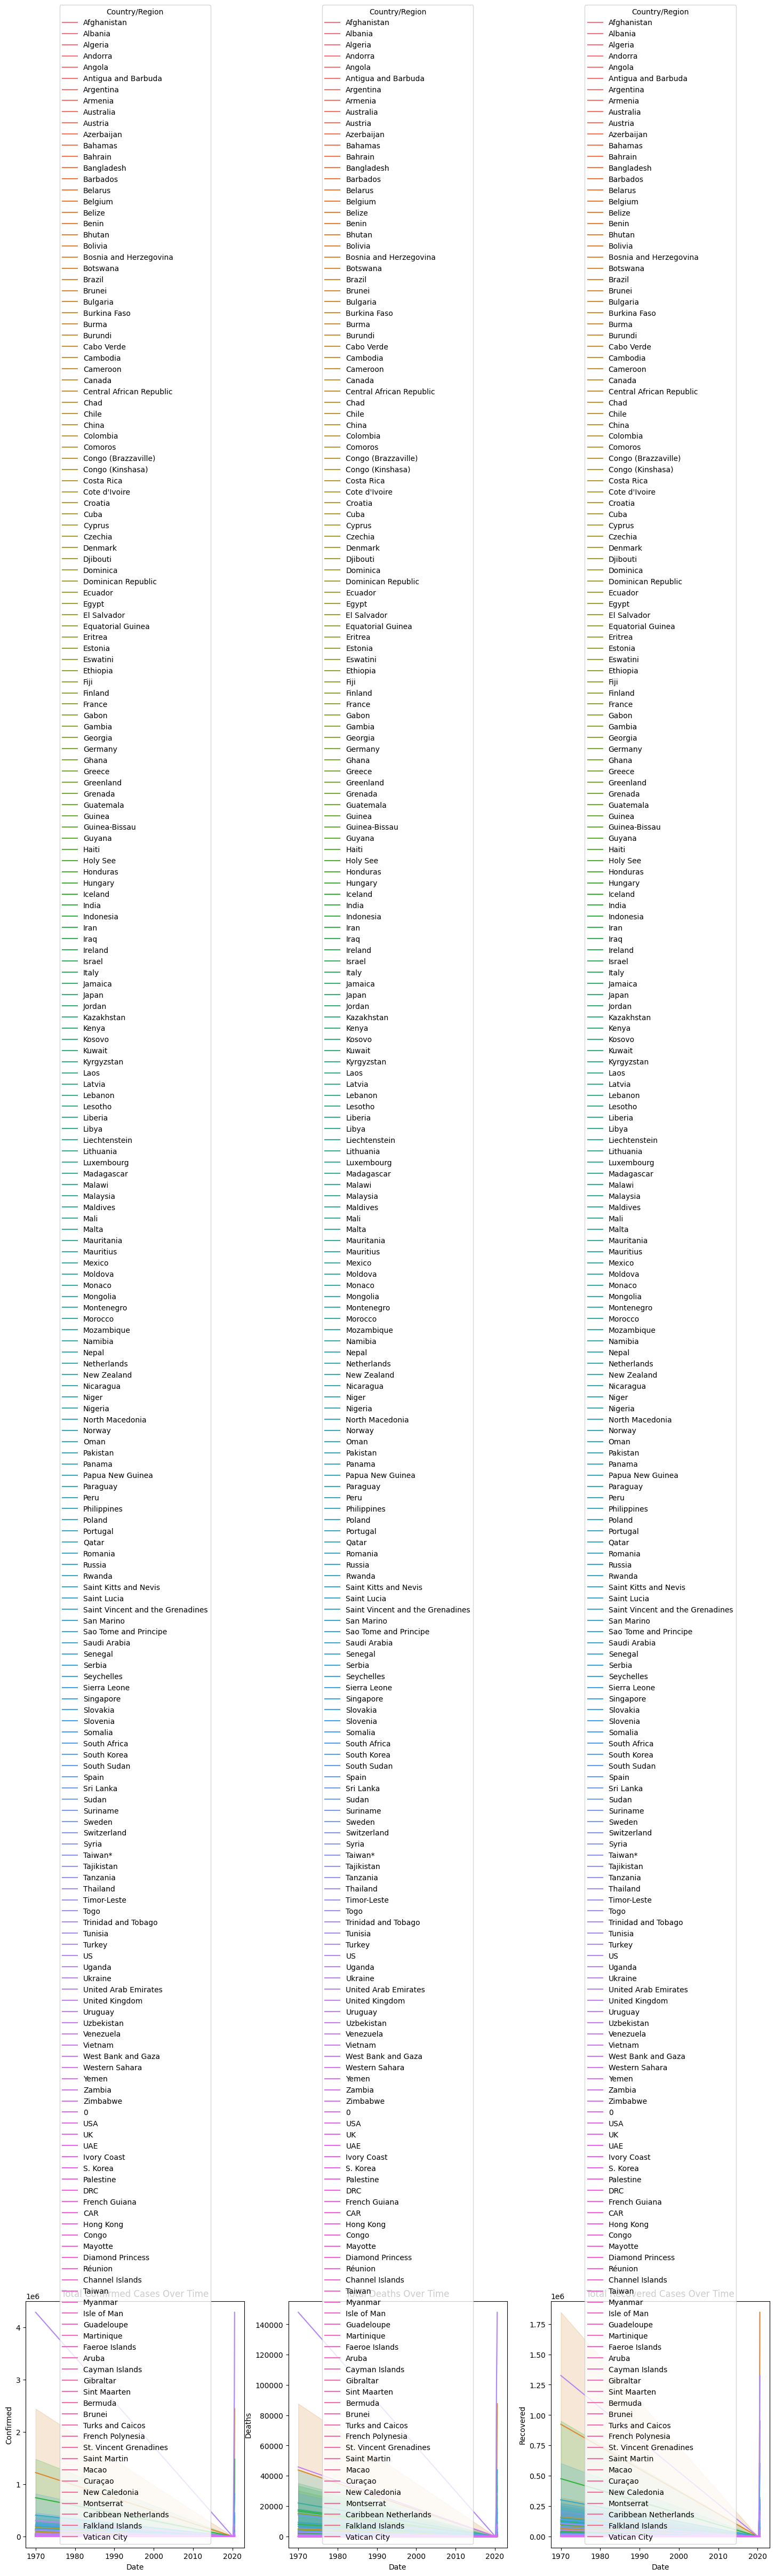

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the total number of confirmed cases over time
sns.lineplot(data=data_combined, x='Date', y='Confirmed', hue='Country/Region', ax=axes[0])
axes[0].set_title('Total Confirmed Cases Over Time')

# Plot the total number of deaths over time
sns.lineplot(data=data_combined, x='Date', y='Deaths', hue='Country/Region', ax=axes[1])
axes[1].set_title('Total Deaths Over Time')

# Plot the total number of recovered cases over time
sns.lineplot(data=data_combined, x='Date', y='Recovered', hue='Country/Region', ax=axes[2])
axes[2].set_title('Total Recovered Cases Over Time')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


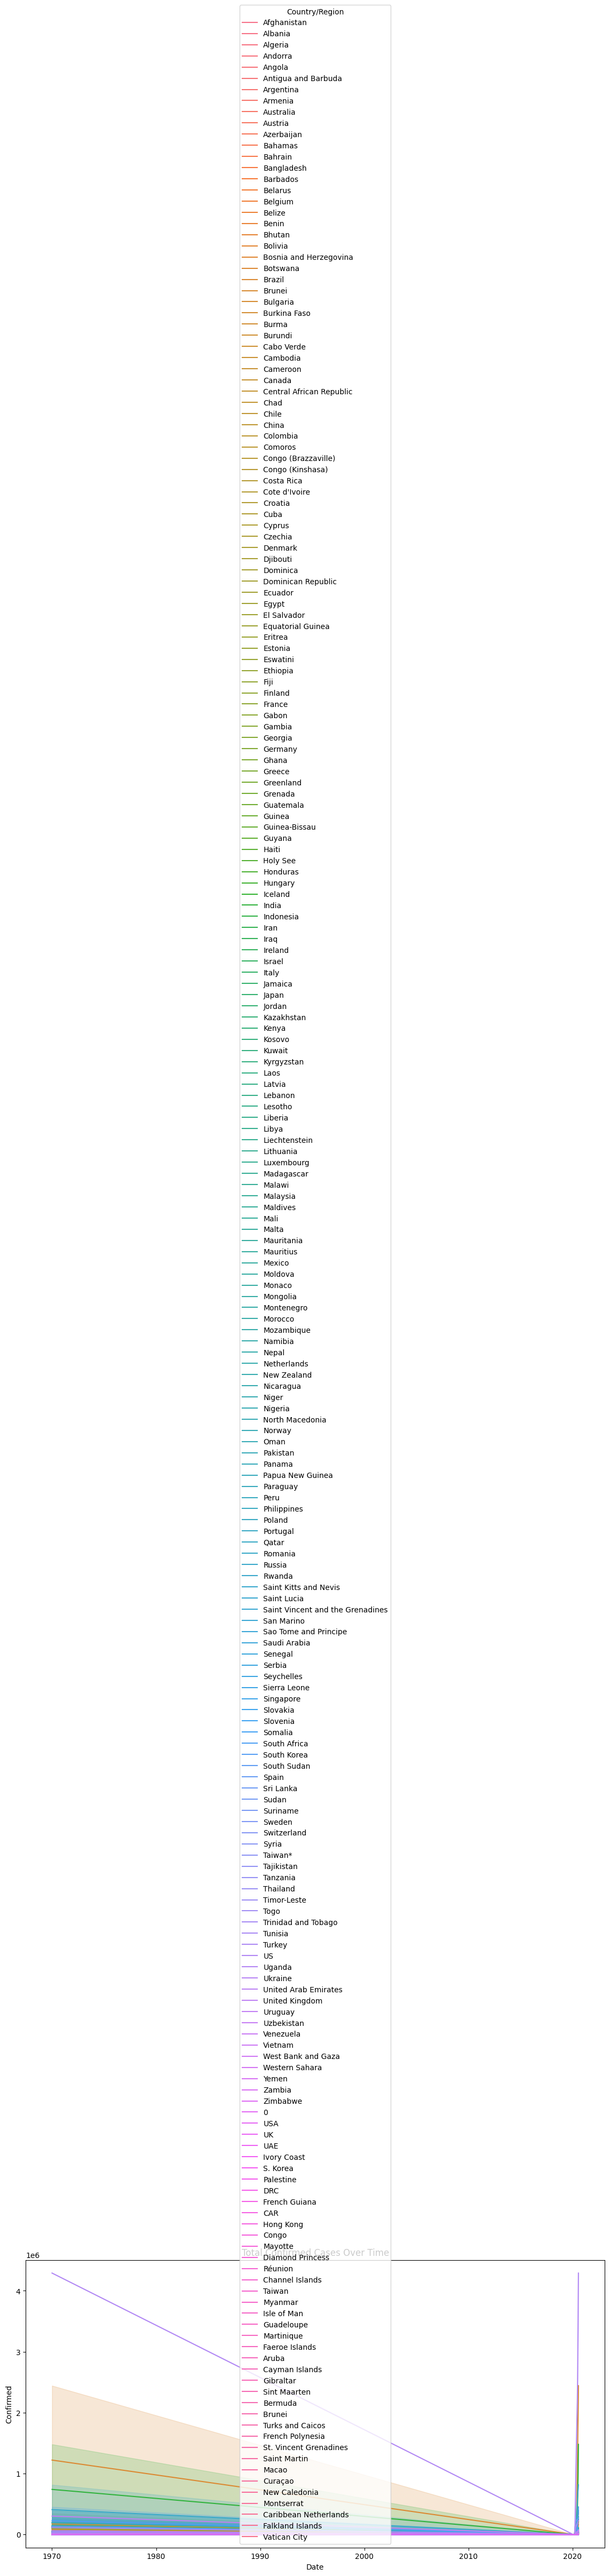

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the total number of confirmed cases over time
plt.figure(figsize=(14,7))
sns.lineplot(data=data_combined, x='Date', y='Confirmed', hue='Country/Region')
plt.title('Total Confirmed Cases Over Time')
plt.show()

# Plot the total number of deaths over time
plt.figure(figsize=(14,7))
sns.lineplot(data=data_combined, x='Date', y='Deaths', hue='Country/Region')
plt.title('Total Deaths Over Time')
plt.show()

# Plot the total number of recovered cases over time
plt.figure(figsize=(14,7))
sns.lineplot(data=data_combined, x='Date', y='Recovered', hue='Country/Region')
plt.title('Total Recovered Cases Over Time')
plt.show()




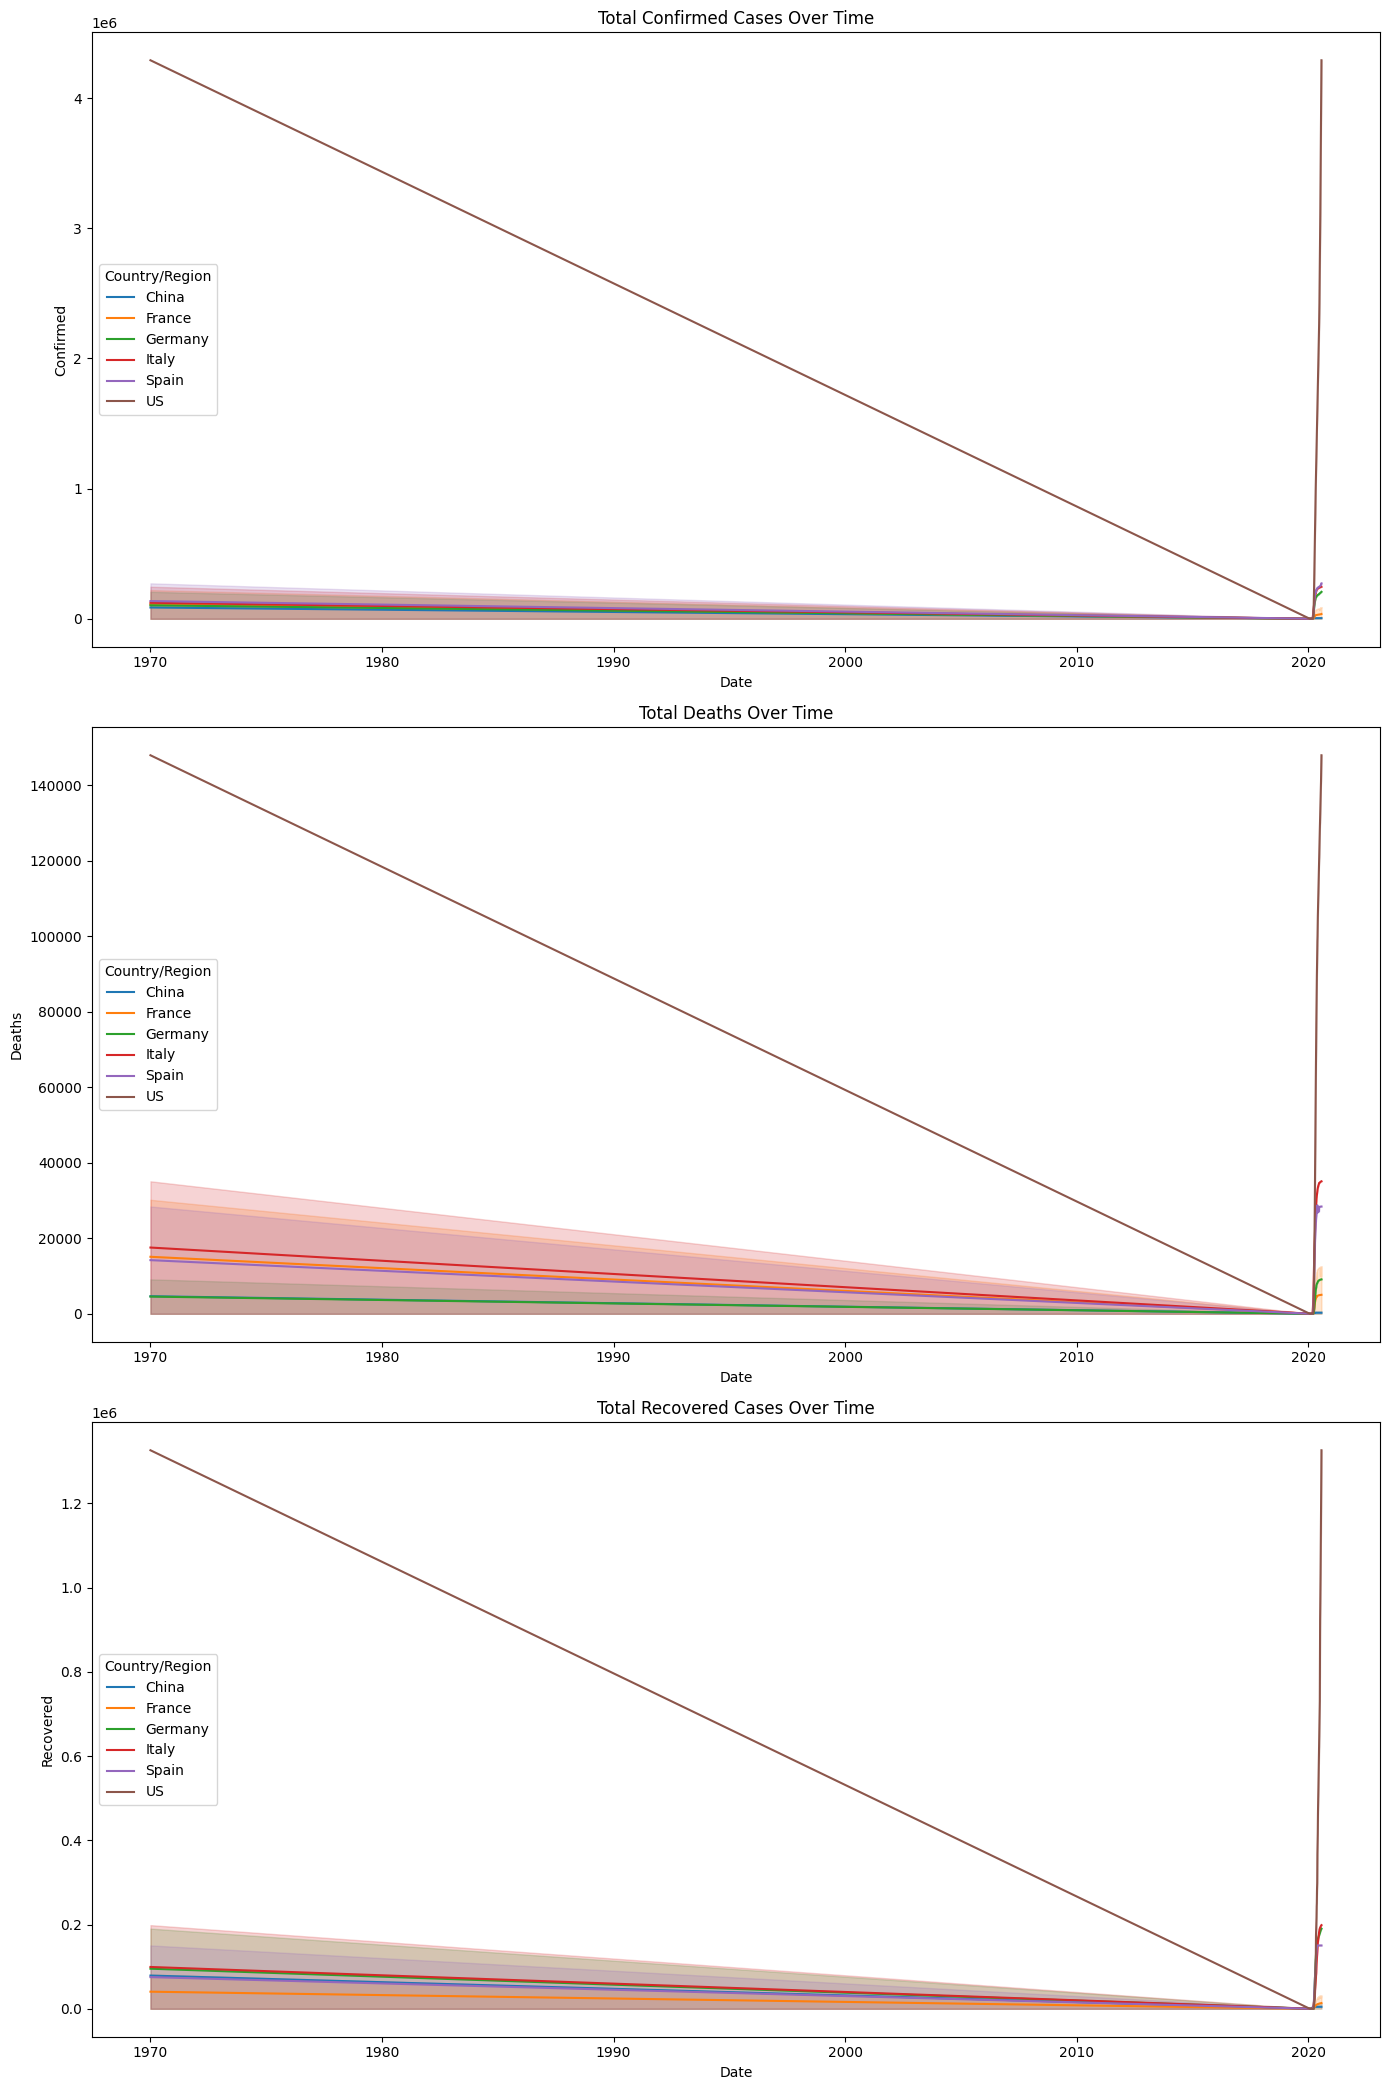

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few specific countries
countries = ['US', 'China', 'Italy', 'Spain', 'France', 'Germany']
data_selected = data_combined[data_combined['Country/Region'].isin(countries)]

# Create subplots
fig, axs = plt.subplots(3, figsize=(14, 21))

# Plot the total number of confirmed cases over time
sns.lineplot(ax=axs[0], data=data_selected, x='Date', y='Confirmed', hue='Country/Region')
axs[0].set_title('Total Confirmed Cases Over Time')

# Plot the total number of deaths over time
sns.lineplot(ax=axs[1], data=data_selected, x='Date', y='Deaths', hue='Country/Region')
axs[1].set_title('Total Deaths Over Time')

# Plot the total number of recovered cases over time
sns.lineplot(ax=axs[2], data=data_selected, x='Date', y='Recovered', hue='Country/Region')
axs[2].set_title('Total Recovered Cases Over Time')

# Show the plot
plt.tight_layout()
plt.show()


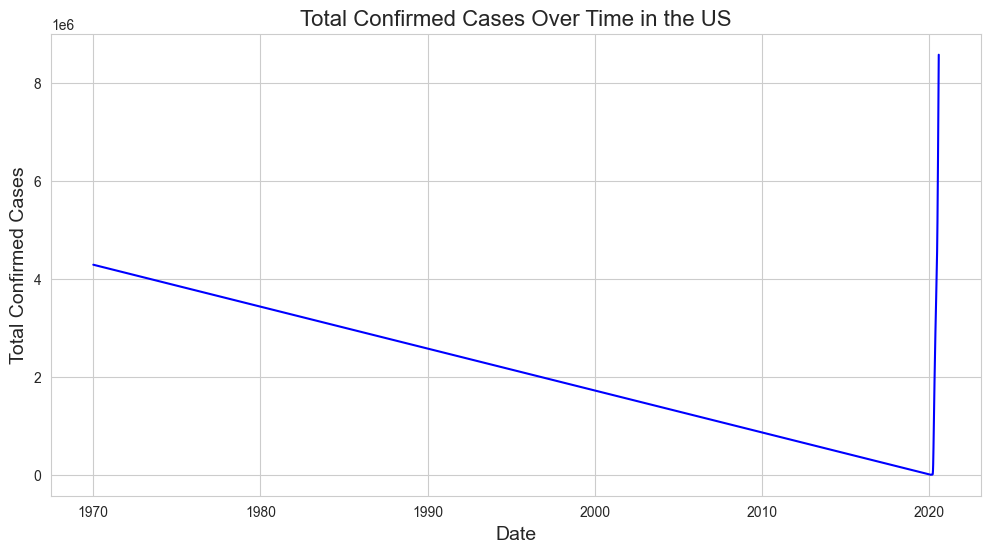

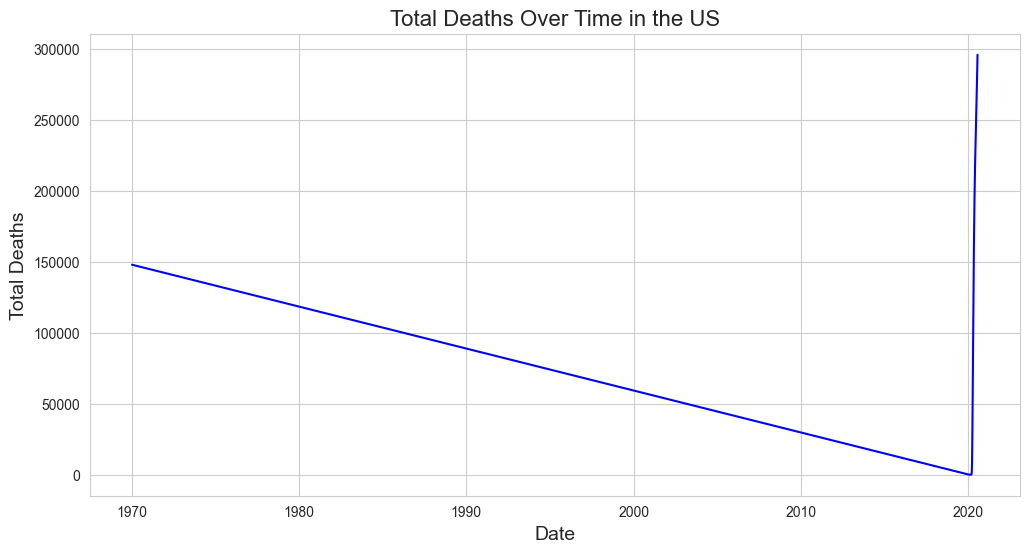

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the United States
data_us = data_combined[data_combined['Country/Region'] == 'US']

# Set the style of the plots
sns.set_style("whitegrid")

# Create a function to plot the data
def plot_data(data, column, title, ylabel):
    # Calculate the total number for each date
    total_by_date_us = data.groupby('Date')[column].sum()

    # Create a new figure
    plt.figure(figsize=(12, 6))

    # Plot the total number over time
    sns.lineplot(data=total_by_date_us, color='blue')

    # Set the title and labels
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Show the plot
    plt.show()

# Plot the total number of confirmed cases over time in the US
plot_data(data_us, 'Confirmed', 'Total Confirmed Cases Over Time in the US', 'Total Confirmed Cases')

# Plot the total number of deaths over time in the US
plot_data(data_us, 'Deaths', 'Total Deaths Over Time in the US', 'Total Deaths')


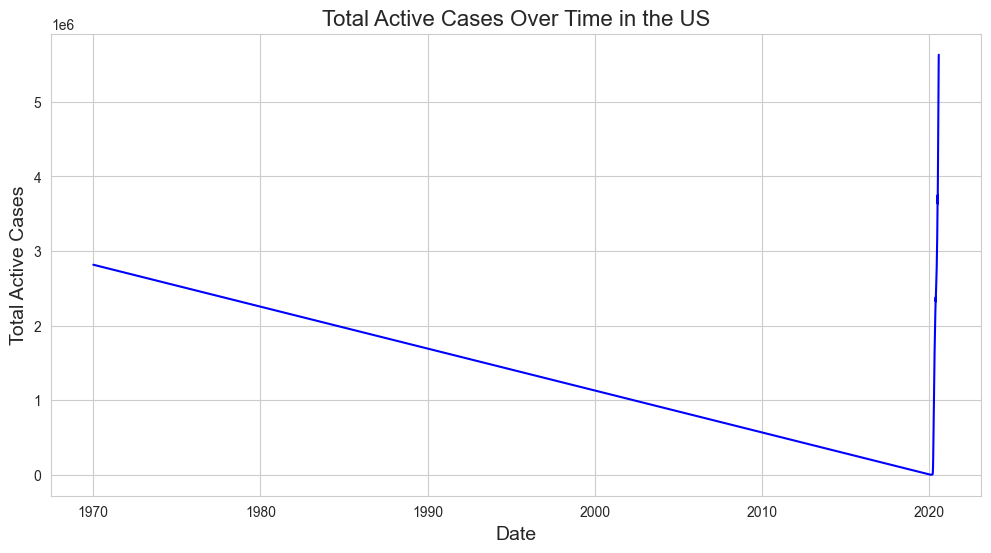

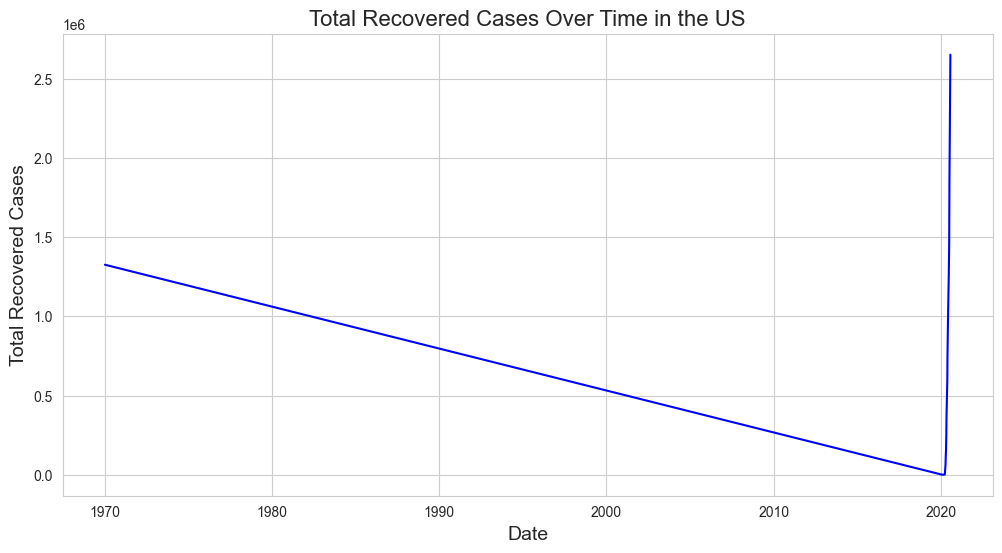

In [13]:
# Plot the total number of active cases over time in the US
plot_data(data_us, 'Active', 'Total Active Cases Over Time in the US', 'Total Active Cases')

# Plot the total number of recovered cases over time in the US
plot_data(data_us, 'Recovered', 'Total Recovered Cases Over Time in the US', 'Total Recovered Cases')


In [22]:
# Create a new feature for the number of cases in the previous week
data_combined['Cases_prev_week'] = data_combined.groupby('Country/Region')['Confirmed'].shift(7)

# Create a new feature for the change in the number of cases from the previous day
data_combined['Cases_change'] = data_combined['Confirmed'] - data_combined['Cases_prev_week']

# Drop any rows with missing values
data_combined.dropna(inplace=True)

# Display the first few rows of the data
print(data_combined.head())


    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
324          China        0.0     0.0        0.0     0.0        0.0   
325          China        5.0     0.0        0.0     5.0        0.0   
326          China        7.0     0.0        0.0     7.0        0.0   
327          China        1.0     0.0        0.0     1.0        0.0   
328          China        3.0     0.0        0.0     3.0        0.0   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
324         0.0            0.0                 0.0                    0.0   
325         0.0            0.0                 0.0                    0.0   
326         0.0            0.0                 0.0                    0.0   
327         0.0            0.0                 0.0                    0.0   
328         0.0            0.0                 0.0                    0.0   

     ...  WHO Region_Americas  WHO Region_Eastern Mediterranean  \
324  ...                    0              

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Choose a country to model
country = 'China'

# Prepare the data
data_country = data_combined[data_combined['Country/Region'] == country]
data_country.set_index('Date', inplace=True)

# Define the model
model = ARIMA(data_country['Confirmed'], order=(5,1,0))

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monoto

                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                 6344
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -68462.820
Date:                Wed, 05 Jul 2023   AIC                         136937.641
Time:                        08:38:40   BIC                         136978.171
Sample:                             0   HQIC                        136951.676
                               - 6344                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8150      0.012    -66.259      0.000      -0.839      -0.791
ar.L2         -0.6429      0.016    -41.012      0.000      -0.674      -0.612
ar.L3         -0.4729      0.017    -27.580      0.0

In [25]:
# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)

# Print the forecast
print(forecast)


6344    86333.571334
6345    86394.341236
6346    86447.327780
6347    86482.984077
6348    86495.851448
6349    86488.464865
6350    86443.685302
Name: predicted_mean, dtype: float64


/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
from sklearn.metrics import mean_absolute_error

# Get the actual number of confirmed cases for the next 7 days
actual = data_country['Confirmed'][-7:]

# Calculate the MAE
mae = mean_absolute_error(actual, forecast)

# Print the MAE
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 333.2751011108215


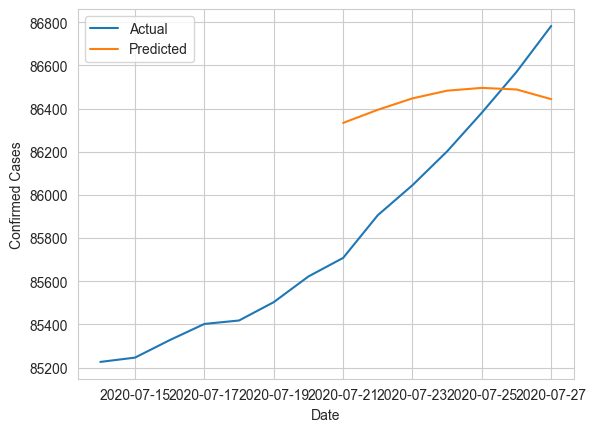

In [27]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(data_country.index[-14:], data_country['Confirmed'][-14:], label='Actual')

# Plot the predicted values
plt.plot(data_country.index[-7:], forecast, label='Predicted')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()

# Show the plot
plt.show()


In [28]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define the parameter grid
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 3)

# Keep track of the best parameters and MAE
best_params = None
best_mae = np.inf

# Grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Train the model
                model = ARIMA(data_country['Confirmed'], order=(p,d,q))
                model_fit = model.fit()

                # Make predictions
                forecast = model_fit.forecast(steps=7)

                # Calculate the MAE
                mae = mean_absolute_error(data_country['Confirmed'][-7:], forecast)

                # Update the best MAE and parameters
                if mae < best_mae:
                    best_mae = mae
                    best_params = (p, d, q)
            except:
                continue

# Print the best MAE and parameters
print(f'Best MAE: {best_mae}')
print(f'Best parameters: {best_params}')


/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monoto

Best MAE: 289.06242127117
Best parameters: (6, 1, 0)


/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [29]:
# Train the final model with the best parameters
model = ARIMA(data_country['Confirmed'], order=best_params)
model_fit = model.fit()

# Make predictions for the next 7 days
forecast = model_fit.forecast(steps=7)

# Print the forecast
print(forecast)


/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monoto

6344    86255.568703
6345    86319.553255
6346    86370.529564
6347    86409.727258
6348    86433.378662
6349    86445.027623
6350    86431.292871
Name: predicted_mean, dtype: float64


/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/var/folders/0q/2y70gylj1sj8j0697rn106q00000gn/T/ipykernel_20118/2041563990.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=data_country.index[-1], periods=8, closed='right')


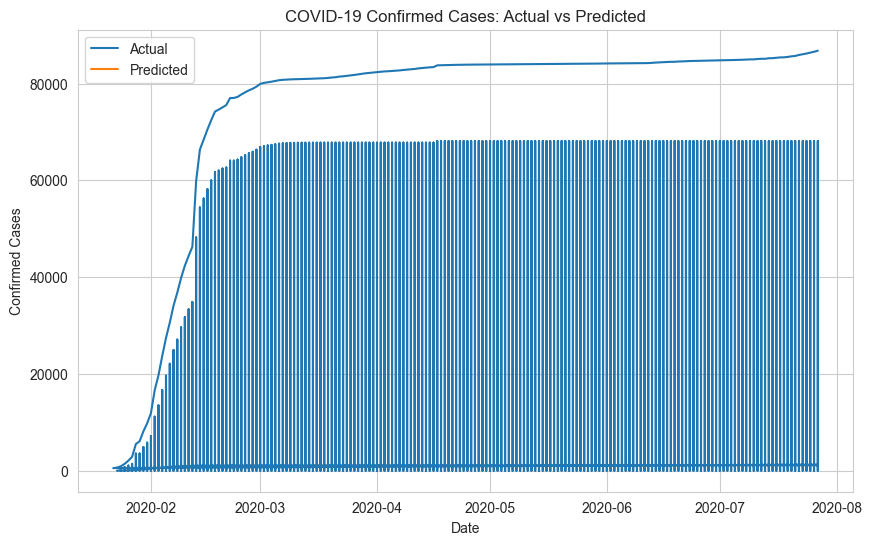

In [30]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define the date range for the forecast
forecast_index = pd.date_range(start=data_country.index[-1], periods=8, closed='right')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Predicted'])

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(data_country['Confirmed'], label='Actual')
plt.plot(forecast_df['Predicted'], label='Predicted')
plt.title('COVID-19 Confirmed Cases: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
# Import necessary libraries
from datetime import datetime

# Calculate the number of days remaining in the year
today = datetime.today()
end_of_year = datetime(today.year, 12, 31)
days_remaining = (end_of_year - today).days

# Make predictions for the remaining days of the year
forecast = model_fit.forecast(steps=days_remaining)

# Print the forecast
print(forecast)


6344    86255.568703
6345    86319.553255
6346    86370.529564
6347    86409.727258
6348    86433.378662
            ...     
6517    86411.725883
6518    86411.725883
6519    86411.725883
6520    86411.725883
6521    86411.725883
Name: predicted_mean, Length: 178, dtype: float64


/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/leandrohugo/opt/anaconda3/envs/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


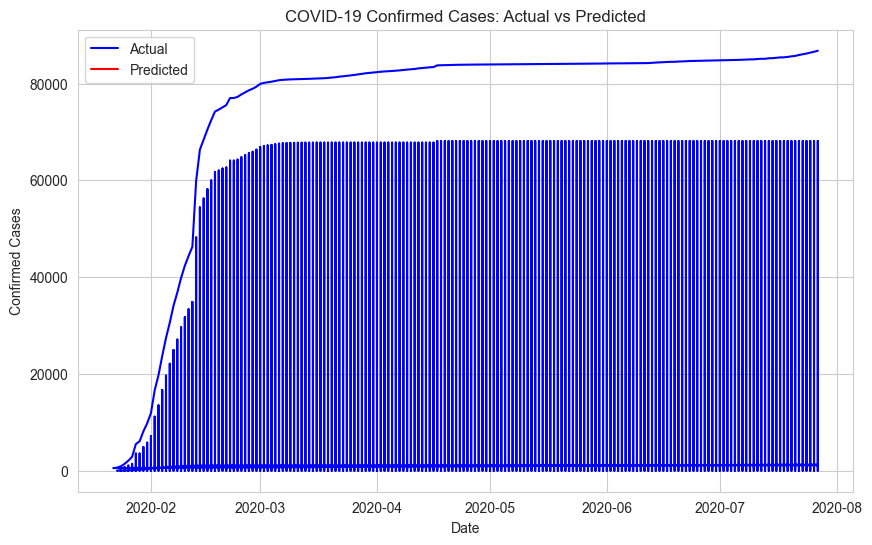

In [34]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(data_country['Confirmed'], label='Actual', color='blue')
plt.plot(forecast_df['Predicted'], label='Predicted', color='red')
plt.title('COVID-19 Confirmed Cases: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()


MONTH


In [36]:
# Filter the data for the year 2020
data_combined_2020 = data_combined[data_combined['Date'].dt.year == 2020]

# Create a new 'Month' feature
data_combined_2020['Month'] = data_combined_2020['Date'].dt.month

# Display the first few rows of the data
print(data_combined_2020.head())


    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
324          China        0.0     0.0        0.0     0.0        0.0   
325          China        5.0     0.0        0.0     5.0        0.0   
326          China        7.0     0.0        0.0     7.0        0.0   
327          China        1.0     0.0        0.0     1.0        0.0   
328          China        3.0     0.0        0.0     3.0        0.0   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
324         0.0            0.0                 0.0                    0.0   
325         0.0            0.0                 0.0                    0.0   
326         0.0            0.0                 0.0                    0.0   
327         0.0            0.0                 0.0                    0.0   
328         0.0            0.0                 0.0                    0.0   

     ...  WHO Region_Americas  WHO Region_Eastern Mediterranean  \
324  ...                    0              

/var/folders/0q/2y70gylj1sj8j0697rn106q00000gn/T/ipykernel_20118/1493993684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_combined_2020['Month'] = data_combined_2020['Date'].dt.month


In [37]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = data_combined_2020[['Month', 'Cases_prev_week', 'Cases_change']]
y = data_combined_2020['Confirmed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_test, predictions)

print('Mean Absolute Error:', mae)


Mean Absolute Error: 32.8788087756466


In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Define the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
best_predictions = best_model.predict(X_test)

# Calculate the mean absolute error of the best predictions
best_mae = mean_absolute_error(y_test, best_predictions)

print('Best Mean Absolute Error:', best_mae)


In [ ]:
def predict_cases(month, cases_prev_week, cases_change):
    return best_model.predict([[month, cases_prev_week, cases_change]])[0]


# Let's proceed with the data preprocessing step. This could involve cleaning the data, handling missing values, and aggregating the data by country and date.
- This code converts the 'Date' column to datetime format, fills any missing values with 0, and aggregates the data by country and date. The groupby method groups the data by the specified columns, and the sum method calculates the sum of the remaining columns for each group. 


In [ ]:
# Convert the 'Date' column to datetime format
data_covid_19_clean['Date'] = pd.to_datetime(data_covid_19_clean['Date'])

# Fill any missing values
data_covid_19_clean.fillna(0, inplace=True)

# Aggregate the data by country and date
data_covid_19_clean = data_covid_19_clean.groupby(['Country/Region', 'Date']).sum().reset_index()


# Exploratory data analysis. Here's how you can create a plot of the number of COVID-19 cases over time in the US.
- This code filters the data for the US, creates a plot of the number of confirmed cases over time, and adds a title and labels to the plot.

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for the US
data_covid_19_clean_US = data_covid_19_clean[data_covid_19_clean['Country/Region'] == 'US']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(data_covid_19_clean_US['Date'], data_covid_19_clean_US['Confirmed'])

# Add a title and labels
plt.title('COVID-19 Cases Over Time in the US')
plt.xlabel('Date')
plt.ylabel('Number of Cases')

# Display the plot
plt.show()


# We'll use the sklearn library's train_test_split function to split our data into a training set and a test set.
  - This code separates the features (the date features) and the targets (the sales data for each drug), and then splits each set of features and targets into a training set (80% of the data) and a test set (20% of the data).

In [ ]:
# Create lag features
for i in range(1, 8):
    data_covid_19_clean_US[f'lag_{i}'] = data_covid_19_clean_US['Confirmed'].shift(i)

# Create window features
data_covid_19_clean_US['rolling_mean'] = data_covid_19_clean_US['Confirmed'].rolling(window=7).mean()
data_covid_19_clean_US['rolling_std'] = data_covid_19_clean_US['Confirmed'].rolling(window=7).std()

# Create date features
data_covid_19_clean_US['year'] = data_covid_19_clean_US['Date'].dt.year
data_covid_19_clean_US['month'] = data_covid_19_clean_US['Date'].dt.month
data_covid_19_clean_US['day'] = data_covid_19_clean_US['Date'].dt.day
data_covid_19_clean_US['day_of_week'] = data_covid_19_clean_US['Date'].dt.dayofweek


# feature engineering.

One common approach in time series forecasting is to create lag features. These are features that use previous time steps to predict the next time step. For example, we could create a feature that represents the number of cases one week ago, two weeks ago, etc.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define the features and target
features = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'rolling_mean', 'rolling_std', 'year', 'month', 'day', 'day_of_week']
X = data_covid_19_clean_US.dropna()[features]
y = data_covid_19_clean_US.dropna()['Confirmed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Absolute Error: {mae}')


# Model Evaluation. We'll use the mean absolute error (MAE) metric from the sklearn library to evaluate the performance of our models.
- This code makes predictions on the test data using our trained models and calculates the mean absolute error of these predictions. The mean absolute error is the average of the absolute differences between the predicted and actual values. It gives us an idea of how well our models are performing.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
best_predictions = best_model.predict(X_test)

# Calculate the mean absolute error of the best predictions
best_mae = mean_absolute_error(y_test, best_predictions)

print(f'Best Mean Absolute Error: {best_mae}')


# We can use the Mean Absolute Percentage Error (MAPE) as a metric for evaluation. MAPE expresses the absolute difference between the actual and predicted values as a percentage, which can be more intuitive to understand.
- However, please note that sklearn doesn't provide a built-in function for MAPE, but we can easily define it ourselves. This code calculates the MAPE for each drug and prints the results. The MAPE gives us an idea of the average error of our models as a percentage of the actual values.

In [ ]:
def predict_cases(features):
    """
    Predict the number of COVID-19 cases using the trained model.

    Parameters:
    features (dict): A dictionary where the keys are the feature names and the values are the feature values.

    Returns:
    float: The predicted number of cases.
    """
    # Convert the features to a DataFrame
    features_df = pd.DataFrame([features])

    # Make a prediction
    prediction = best_model.predict(features_df)

    return prediction[0]


In [ ]:
features = {
    'lag_1': 1000,
    'lag_2': 1100,
    'lag_3': 1200,
    'lag_4': 1300,
    'lag_5': 1400,
    'lag_6': 1500,
    'lag_7': 1600,
    'rolling_mean': 1300,
    'rolling_std': 200,
    'year': 2020,
    'month': 7,
    'day': 20,
    'day_of_week': 1
}

prediction = predict_cases(features)

print(f'Predicted number of cases: {prediction}')


In [ ]:
import numpy as np

# Create a DataFrame for future dates
future_dates = pd.date_range(start='2023-01-01', end='2023-12-31')
future_features = pd.DataFrame({'Date': future_dates})

# Fill the lag and rolling features with the last known values
for i in range(1, 8):
    future_features[f'lag_{i}'] = data_covid_19_clean_US['Confirmed'].iloc[-i]
future_features['rolling_mean'] = data_covid_19_clean_US['Confirmed'].rolling(window=7).mean().iloc[-1]
future_features['rolling_std'] = data_covid_19_clean_US['Confirmed'].rolling(window=7).std().iloc[-1]

# Fill the date features with the corresponding values from the 'Date' column
future_features['year'] = future_features['Date'].dt.year
future_features['month'] = future_features['Date'].dt.month
future_features['day'] = future_features['Date'].dt.day
future_features['day_of_week'] = future_features['Date'].dt.dayofweek

# Make predictions for the future dates
future_predictions = best_model.predict(future_features[features])

# Create a plot of the predictions
plt.figure(figsize=(10, 6))
plt.plot(future_features['Date'], future_predictions)

# Add a title and labels
plt.title('Predicted COVID-19 Cases in the US for 2023')
plt.xlabel('Date')
plt.ylabel('Number of Cases')

# Display the plot
plt.show()


# Model Deployment. 
- Create a function that takes in the features of a new data point and returns the predicted sales for each drug.
  - This function creates a DataFrame from the input features, makes predictions using our trained models, and returns the predicted sales for each drug.

In [ ]:
def predict_drug_sales(day_of_week, month, day_of_month, day_of_year):
    # Create a DataFrame from the input features
    features = pd.DataFrame({
        'day_of_week': [day_of_week],
        'month': [month],
        'day_of_month': [day_of_month],
        'day_of_year': [day_of_year]
    })

    # Make predictions
    predictions_A = best_model_A.predict(features)
    predictions_B = best_model_B.predict(features)
    predictions_C = best_model_C.predict(features)
    
    # Return the predictions
    return predictions_A[0], predictions_B[0], predictions_C[0]


# You can now use this function to make predictions on new data. For example, to predict the sales for the 7th day of the week, the 5th month, the 15th day of the month, and the 135th day of the year, you would call the function like this:

In [ ]:
predict_drug_sales(7, 5, 15, 135)

This concludes the model deployment step. 